In [8]:
import pandas as pd
import yfinance as yf
from datetime import timedelta, datetime

delta = timedelta(days=-300)
today = datetime.now()

# Load EURZAR (or EURDZD if it's a custom asset)
eurdzd = yf.download("EURDZD=X", today+delta)
TEMP = eurdzd.copy(deep=True)
TEMP = TEMP.dropna()
TEMP.to_csv("data"+"/"+"EURDZD"+"_D1"+".csv")
oil = yf.download("CL=F", today+delta)  # CL=F is WTI Crude Futures
TEMP = oil.copy(deep=True)
TEMP = TEMP.dropna()
TEMP.to_csv("data"+"/"+"OIL"+"_D1"+".csv")


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


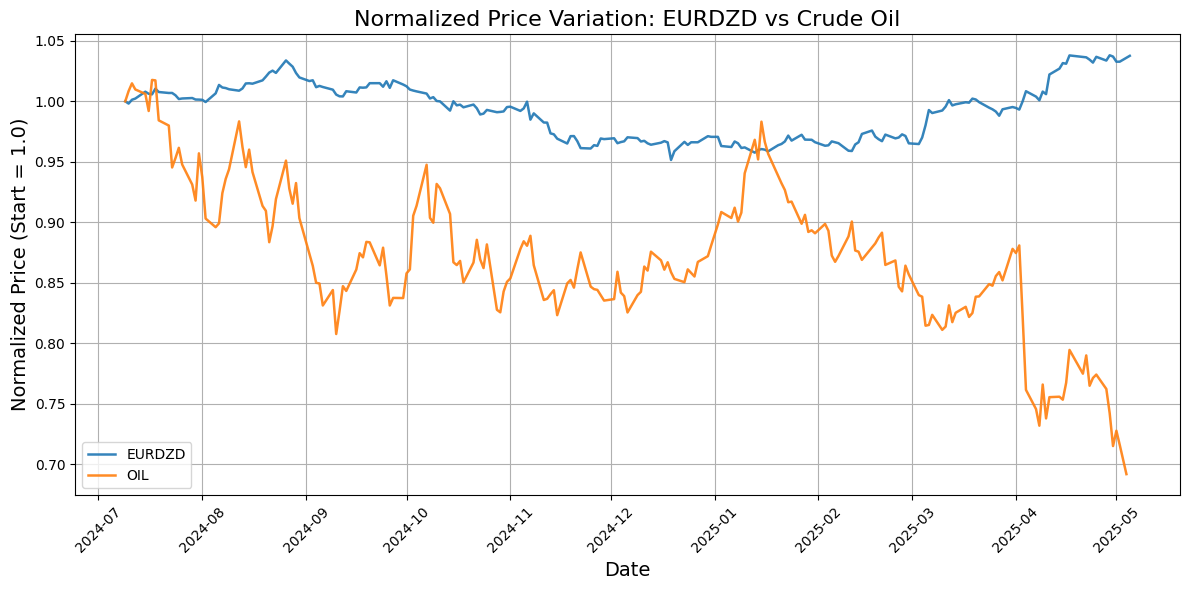

In [14]:
import matplotlib.pyplot as plt

data_dzd = eurdzd
data_dzd.index = pd.to_datetime(data_dzd.index)  # Ensure datetime index
series_dzd = data_dzd['Close'].astype(float)
normalized_series_dzd = series_dzd / series_dzd.dropna().iloc[0]
price_data_dzd = normalized_series_dzd

data_oil = oil
data_oil.index = pd.to_datetime(data_oil.index)  # Ensure datetime index
series_oil = data_oil['Close'].astype(float)
normalized_series_oil = series_oil / series_oil.dropna().iloc[0]
price_data_oil = normalized_series_oil

# Plot
plt.figure(figsize=(12, 6))
plt.plot(price_data_dzd.index, price_data_dzd, label='EURDZD', lw=1.8, alpha=0.9)
plt.plot(price_data_oil.index, price_data_oil, label='OIL', lw=1.8, alpha=0.9)

plt.title("Normalized Price Variation: EURDZD vs Crude Oil", fontsize=16)
plt.ylabel("Normalized Price (Start = 1.0)", fontsize=14)
plt.xlabel("Date", fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.legend(prop={'size': 10})
plt.tight_layout()
plt.show()